## **Solar-Net: Leveraging Transformers for Enhanced Solar Power Prediction**

----------------

When Dataset is Splitted into 80:20 Ratio

#### **Step 1: Import Libraries**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import HyperModel, RandomSearch
from scikeras.wrappers import KerasRegressor
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

import warnings
warnings.filterwarnings('ignore')

#### **Step 2: Load and Explore the Data**

**Dataset Link:** https://www.kaggle.com/datasets/stucom/solar-energy-power-generation-dataset

In [ ]:
# Load the dataset
data = pd.read_csv('solar_power_data.csv')

In [ ]:
# Display the First Few Attributes
data.head(10)

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   
5                       8.69                               29   
6                       9.72                               27   
7                      10.07                               28   
8                       9.38                               32   
9                       6.54                               47   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   
5                       1034.6                      0.0                  0.0   
6                       1034.0                      0.0                  0.0   
7                       1034.1                      0.0                  0.0   
8                       1033.9                      0.0                  0.0   
9                       1035.1                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   
5                    0.0                              0   
6                    0.0                              0   
7                    0.0                              0   
8                    0.0                              0   
9                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   
5                               0                            0   
6                               0                            0   
7                               0                            0   
8                               0                            0   
9                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   
5                             449.45  ...                          23.63   
6                             469.92  ...                          25.02   
7                             436.99  ...                          14.74   
8                             353.33  ...                           6.58   
9                             228.73  ...                         360.00   

   wind_speed_80_m_above_gnd  wind_direction_80_m_above_gnd  \
0                       9.36                          22.62   
1                       5.99                          32.74   
2  

Here's the description of the columns of Solar Power Generation Dataset:

| Column                                   | Description                                                                                      |
|------------------------------------------|--------------------------------------------------------------------------------------------------|
| `temperature_2_m_above_gnd`             | Air temperature at 2 meters above ground level (°C or °F), affecting solar panel efficiency.     |
| `relative_humidity_2_m_above_gnd`       | Relative humidity percentage at 2 meters above ground level, indicating moisture in the air.     |
| `mean_sea_level_pressure_MSL`           | Average atmospheric pressure at mean sea level (hPa or mmHg), influencing weather conditions.    |
| `total_precipitation_sfc`                | Total precipitation at the surface (mm), which can reduce solar radiation reaching panels.       |
| `snowfall_amount_sfc`                    | Amount of snowfall at the surface (mm), potentially covering solar panels and decreasing output. |
| `total_cloud_cover_sfc`                  | Total cloud cover at the surface (tenths), indicating sky obscurity affecting solar radiation.   |
| `high_cloud_cover_high_cld_lay`         | Amount of high-altitude cloud cover (tenths), affecting solar radiation differently.             |
| `medium_cloud_cover_mid_cld_lay`        | Amount of mid-altitude cloud cover (tenths), influencing solar radiation levels.                 |
| `low_cloud_cover_low_cld_lay`           | Amount of low-altitude cloud cover (tenths), impacting solar generation.                        |
| `shortwave_radiation_backwards_sfc`     | Amount of shortwave radiation reflected back from the surface (W/m²), useful for energy absorption. |
| `wind_speed_10_m_above_gnd`             | Wind speed at 10 meters above ground level (m/s), influencing cooling and solar efficiency.      |
| `wind_direction_10_m_above_gnd`         | Wind direction at 10 meters above ground level (degrees), indicating prevailing winds.           |
| `wind_speed_80_m_above_gnd`             | Wind speed at 80 meters above ground level, relevant for understanding high-altitude conditions.  |
| `wind_direction_80_m_above_gnd`         | Wind direction at 80 meters above ground level (degrees), providing data on higher-altitude winds. |
| `wind_speed_900_mb`                      | Wind speed at a pressure level of 900 mb, typically around 800-1000 meters above ground.       |
| `wind_direction_900_mb`                  | Wind direction at a pressure level of 900 mb (degrees), affecting weather patterns and radiation. |
| `wind_gust_10_m_above_gnd`              | Maximum wind gusts at 10 meters above ground level (m/s), impacting solar panel structures.      |
| `angle_of_incidence`                     | Angle at which sunlight strikes the solar panels (degrees), affecting energy capture.            |
| `zenith`                                 | Angle between the sun and the vertical (degrees), important for solar energy availability.       |
| `azimuth`                                | Angle of the sun's position relative to true north (degrees), helping determine panel orientation. |
| `generated_power_kw`                     | Electrical power generated by the solar panels (kW), the primary output of interest in the dataset. |

In [ ]:
# Display basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [ ]:
# Basic Description of Dataset
data.describe()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
count                4213.000000                      4213.000000   
mean                   15.068111                        51.361025   
std                     8.853677                        23.525864   
min                    -5.350000                         7.000000   
25%                     8.390000                        32.000000   
50%                    14.750000                        48.000000   
75%                    21.290000                        70.000000   
max                    34.900000                       100.000000   

       mean_sea_level_pressure_MSL  total_precipitation_sfc  \
count                  4213.000000              4213.000000   
mean                   1019.337812                 0.031759   
std                       7.022867                 0.170212   
min                     997.500000                 0.000000   
25%                    1014.500000                 0.000000   
50%                    1018.100000                 0.000000   
75%                    1023.600000                 0.000000   
max                    1046.800000                 3.200000   

       snowfall_amount_sfc  total_cloud_cover_sfc  \
count          4213.000000            4213.000000   
mean              0.002808              34.056990   
std               0.038015              42.843638   
min               0.000000               0.000000   
25%               0.000000               0.000000   
50%               0.000000               8.700000   
75%               0.000000             100.000000   
max               1.680000             100.000000   

       high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
count                    4213.000000                     4213.000000   
mean                       14.458818                       20.023499   
std                        30.711707                       36.387948   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         9.000000                       10.000000   
max                       100.000000                      100.000000   

       low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
count                  4213.000000                        4213.000000  ...   
mean                     21.373368                         387.759036  ...   
std                      38.013885                         278.459293  ...   
min                       0.000000                           0.000000  ...   
25%                       0.000000                         142.400000  ...   
50%                       0.000000                         381.810000  ...   
75%                      10.000000                         599.860000  ...   
max                     100.000000                         952.300000  ...   

       wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
count                    4213.000000                4213.000000   
mean                      195.078452                  18.978483   
std                       106.626782                  11.999960   
min                         0.540000                   0.000000   
25%                       153.190000                  10.140000   
50%                       191.770000                  16.240000   
75%                       292.070000                  26.140000   
max                       360.000000                  66.880000   

       wind_direction_80_m_above_gnd  wind_speed_900_mb  \
count                    4213.000000         4213.00000   
mean                      191.166862           16.36319   
std                       108.760021            9.88533   
min                         1.120000            0.00000   
25%                       130.240000            9.18000   
50%                       187

In [ ]:
# Check for the Null Values Column Wise
print(data.isnull().sum())

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64


In [ ]:
# Check for missing values
if data.isnull().sum().any():
    data = data.fillna(data.mean())  # Simple imputation for missing values

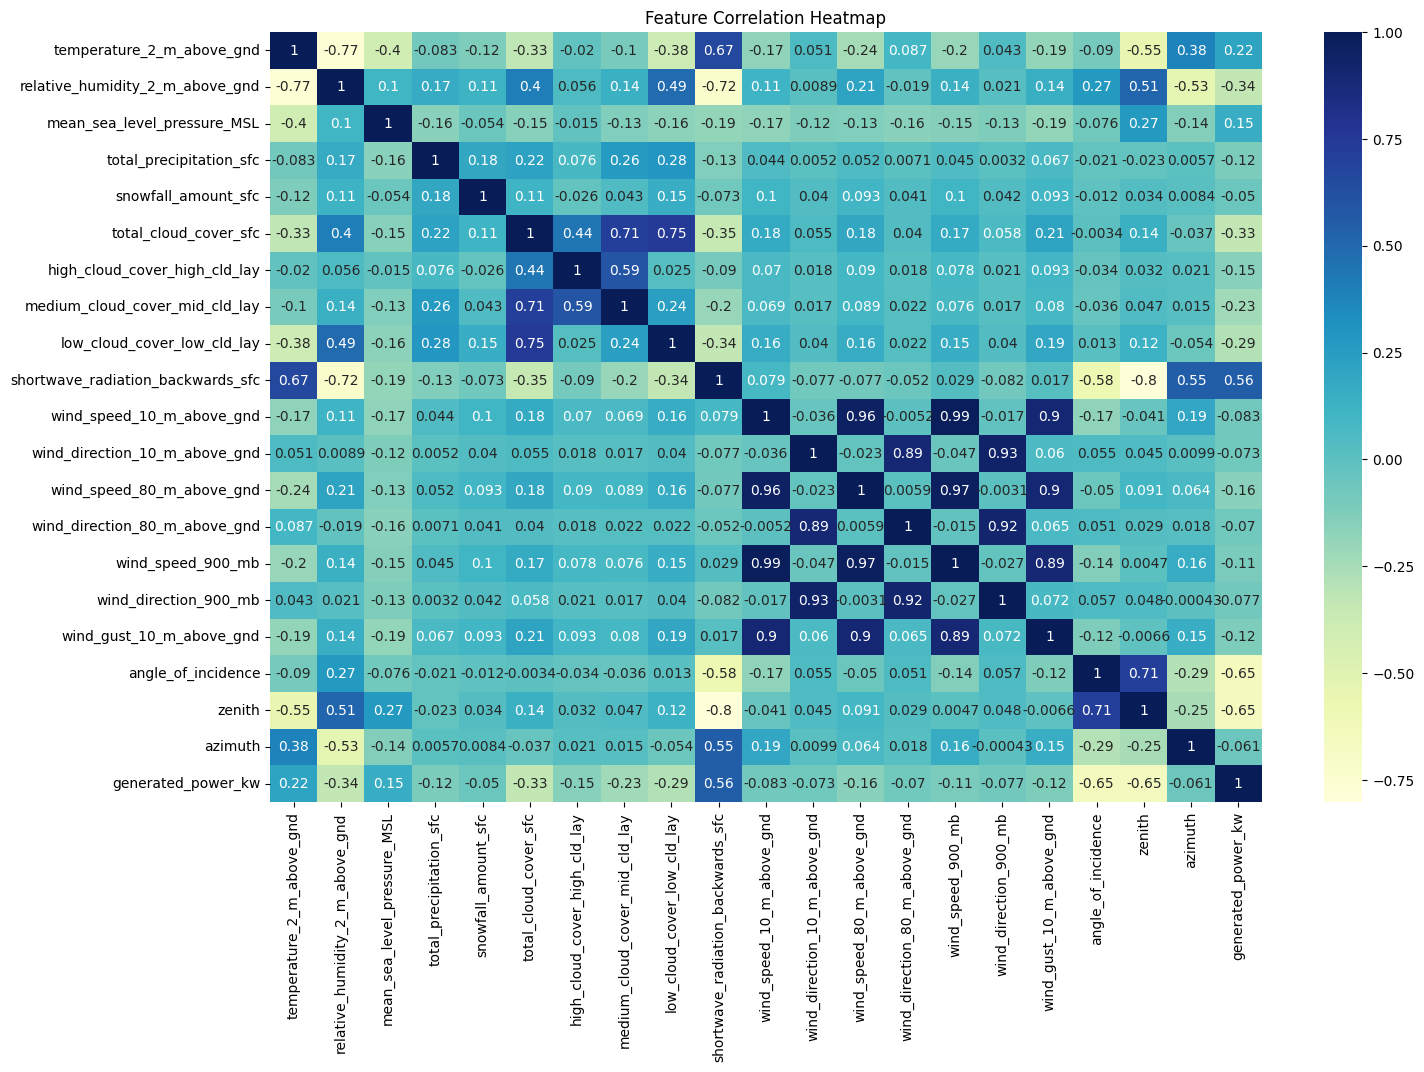

In [ ]:
# Target and feature correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()

#### **Step 3: Data Preprocessing & Exploratory Data Analysis (EDA)**

**Remove Outliers**

In [ ]:
# Detect and remove outliers using Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
filtered_entries = (z_scores < 3).all(axis=1)
data = data[filtered_entries]

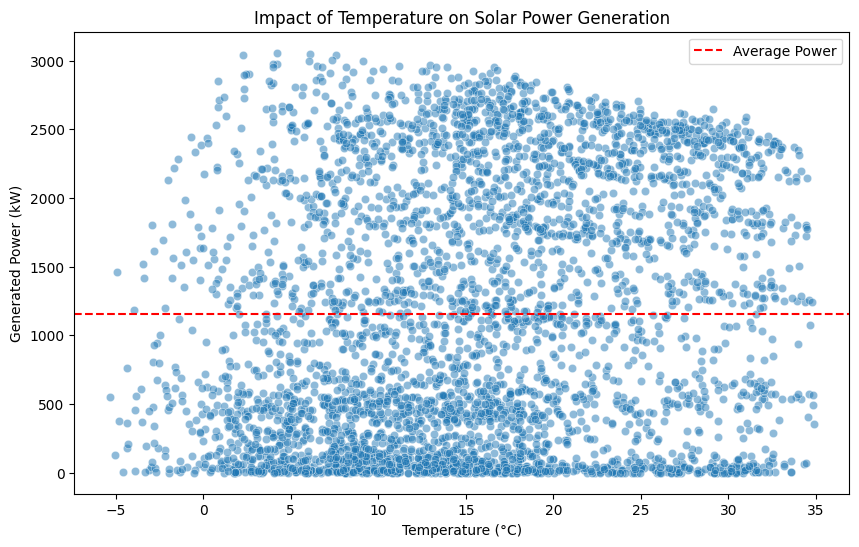

In [ ]:
# Scatter plot for Solar Power Genrated vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='temperature_2_m_above_gnd', y='generated_power_kw', alpha=0.5)
plt.title('Impact of Temperature on Solar Power Generation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Generated Power (kW)')
plt.axhline(y=data['generated_power_kw'].mean(), color='r', linestyle='--', label='Average Power')
plt.legend()
plt.show()

In [ ]:
# Create a figure with a histogram
fig = px.histogram(data_frame=data, x='generated_power_kw', nbins=20,
                   title='Frequency of Solar Power Generation Values',
                   labels={'generated_power_kw': 'Generated Power [kW]',
                           'count': 'Frequency'},
                   template='plotly_dark')
fig.update_xaxes(title_text='Generated Power [kW]')
fig.update_yaxes(title_text='Frequency')
fig.update_layout(width=800, height=500, margin=dict(l=50, r=20, t=50, b=50))
fig.update_traces(histnorm='probability density', marker=dict(color='green'))
fig.show()

In [ ]:
fig = px.scatter(data, x='shortwave_radiation_backwards_sfc', y='generated_power_kw',
                 title='Shortwave Radiation vs. Generated Power',
                 labels={'shortwave_radiation_backwards_sfc': 'Shortwave Radiation [W/m²]',
                         'generated_power_kw': 'Generated Power [kW]'},
                 template='plotly_dark')
fig.update_traces(marker=dict(size=5, opacity=0.6))
fig.update_layout(width=800, height=500)
fig.show()


In [ ]:
fig = px.scatter(data, x='temperature_2_m_above_gnd', y='generated_power_kw',
                 color='total_cloud_cover_sfc',
                 title='Generated Power by Temperature and Cloud Cover',
                 labels={'temperature_2_m_above_gnd': 'Temperature [°C]',
                         'generated_power_kw': 'Generated Power [kW]'},
                 template='plotly_dark')
fig.update_traces(marker=dict(size=5, opacity=0.6))
fig.update_layout(width=800, height=500)
fig.show()

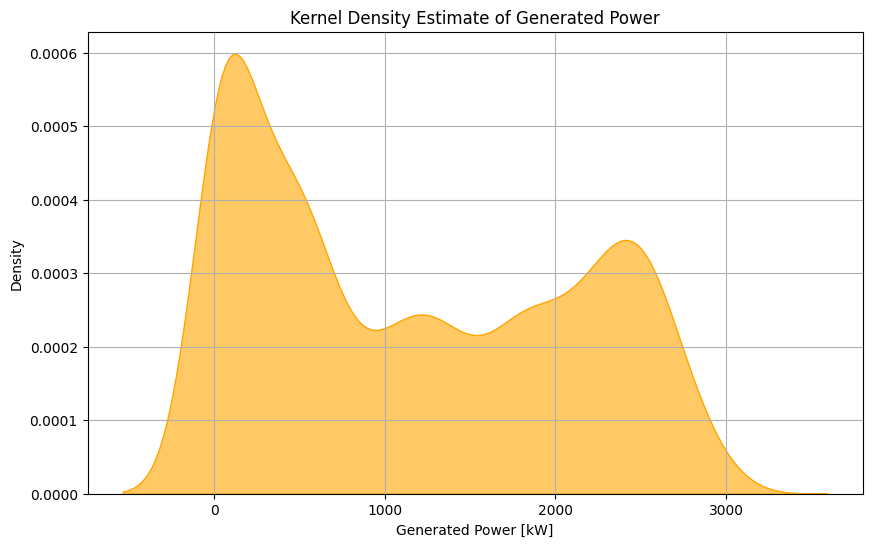

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['generated_power_kw'], fill=True, color='orange', alpha=0.6)
plt.title('Kernel Density Estimate of Generated Power')
plt.xlabel('Generated Power [kW]')
plt.ylabel('Density')
plt.grid()
plt.show()


In [ ]:
# Assuming wind_direction is in degrees
fig = px.scatter_polar(data, r='generated_power_kw', theta='wind_direction_10_m_above_gnd',
                        title='Generated Power vs. Wind Direction',
                        labels={'wind_direction_10_m_above_gnd': 'Wind Direction [°]',
                                'generated_power_kw': 'Generated Power [kW]'},
                        template='plotly_dark')
fig.update_traces(marker=dict(size=5, opacity=0.6))
fig.update_layout(width=800, height=500)
fig.show()


In [ ]:
fig = px.scatter_3d(data, x='temperature_2_m_above_gnd', y='relative_humidity_2_m_above_gnd',
                    z='generated_power_kw', color='generated_power_kw',
                    title='3D Scatter Plot: Temperature, Humidity, and Generated Power',
                    labels={'temperature_2_m_above_gnd': 'Temperature [°C]',
                            'relative_humidity_2_m_above_gnd': 'Relative Humidity [%]',
                            'generated_power_kw': 'Generated Power [kW]'},
                    template='plotly_dark')
fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.update_layout(width=800, height=600)
fig.show()

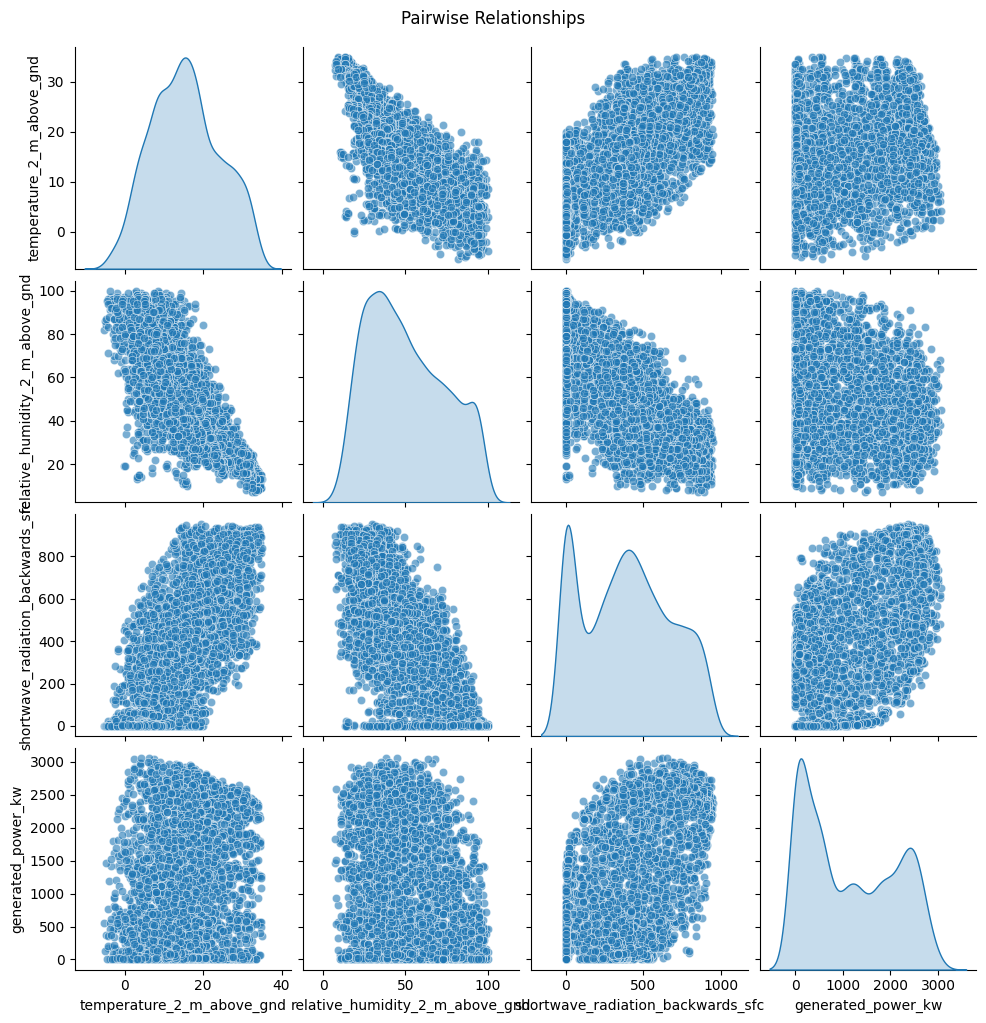

In [ ]:
# Select relevant columns for the pair plot
subset = data[['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
              'shortwave_radiation_backwards_sfc', 'generated_power_kw']]

sns.pairplot(subset, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [ ]:
# Prepare data for radar chart
summary_data = {
    'Factor': ['Temperature [°C]', 'Humidity [%]', 'Cloud Cover [tenths]', 'Wind Speed [m/s]'],
    'Value': [data['temperature_2_m_above_gnd'].mean(),
              data['relative_humidity_2_m_above_gnd'].mean(),
              data['total_cloud_cover_sfc'].mean(),
              data['wind_speed_10_m_above_gnd'].mean()]
}
summary_df = pd.DataFrame(summary_data)

fig = px.line_polar(summary_df, r='Value', theta='Factor', line_close=True,
                     title='Average Weather Factors Affecting Generated Power',
                     template='plotly_dark')
fig.update_traces(fill='toself')
fig.update_layout(width=800, height=500)
fig.show()

**Visualize Data Distributions**

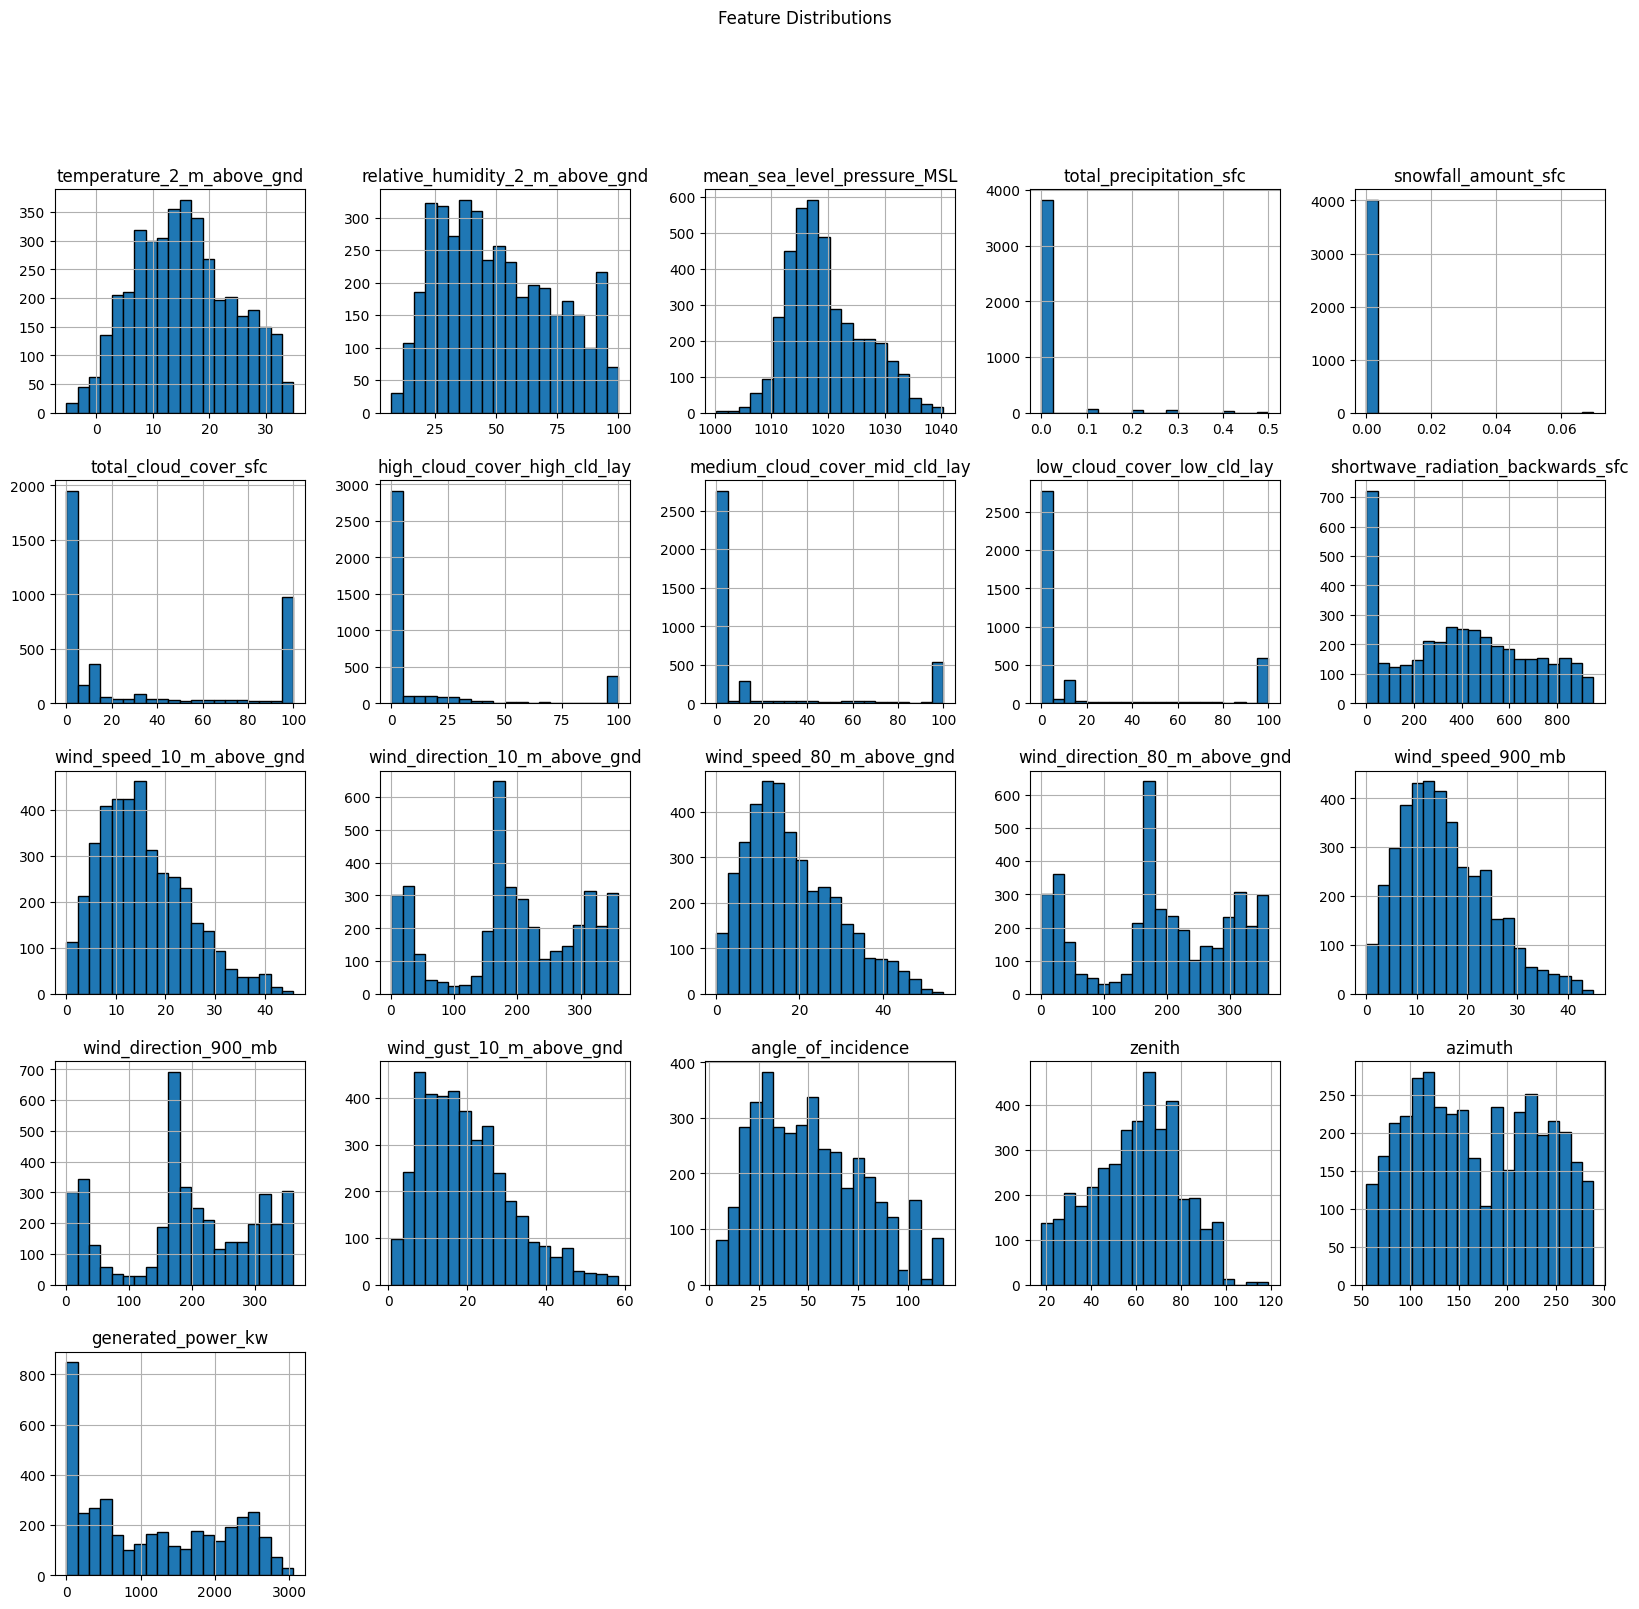

In [ ]:
# Plot distributions of features and target variable
data.hist(bins=20, figsize=(20, 18), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

#### **Step 4: Feature Engineering**

**Feature Creation**

In [ ]:
#check the datatypes
data.dtypes

temperature_2_m_above_gnd            float64
relative_humidity_2_m_above_gnd        int64
mean_sea_level_pressure_MSL          float64
total_precipitation_sfc              float64
snowfall_amount_sfc                  float64
total_cloud_cover_sfc                float64
high_cloud_cover_high_cld_lay          int64
medium_cloud_cover_mid_cld_lay         int64
low_cloud_cover_low_cld_lay            int64
shortwave_radiation_backwards_sfc    float64
wind_speed_10_m_above_gnd            float64
wind_direction_10_m_above_gnd        float64
wind_speed_80_m_above_gnd            float64
wind_direction_80_m_above_gnd        float64
wind_speed_900_mb                    float64
wind_direction_900_mb                float64
wind_gust_10_m_above_gnd             float64
angle_of_incidence                   float64
zenith                               float64
azimuth                              float64
generated_power_kw                   float64
dtype: object

**Feature Scaling**

In [ ]:
# Standardize the data
scaler=StandardScaler()
for col in data.select_dtypes(include=np.number).columns:
    data[col]=scaler.fit_transform(data[[col]])

In [ ]:
# Separate features and target
X = data.drop('generated_power_kw', axis=1)
y = data['generated_power_kw']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Step 5: Machine Model Training**

**Support Vector Regression (SVR)**

In [ ]:
# SVR model with hyperparameter tuning
svr = SVR(max_iter=280)
param_grid_svr = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(X_train, y_train)

# Best SVR model
best_svr = grid_search_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=["Model", "R2 Score (%)", "Mean Squared Error", "Mean Absolute Error"])

#Evalute the Support Vector Machine Model
r2_score_svr = round(r2_score(y_test,y_pred_svr) * 100, 2)
mean_sq_svr = mean_squared_error(y_test,y_pred_svr)
mean_ab_svr = mean_absolute_error(y_test,y_pred_svr)
metrics_df.loc[len(metrics_df)] = ["Support Vector Machine", r2_score_svr, mean_sq_svr, mean_ab_svr]
print("R2 Score for Support Vector Machine Model: ",r2_score_svr,"%")
print("Mean Square Error of Support Vector Machine Model: ",mean_sq_svr)
print("Mean Absolute Error of Support Vector Machine Model: ",mean_ab_svr)

R2 Score for Support Vector Machine Model:  74.77 %
Mean Square Error of Support Vector Machine Model:  0.26052699614422364
Mean Absolute Error of Support Vector Machine Model:  0.406757259232767


In [ ]:
# Create traces for Actual and Predicted values for Support Vector Machine (SVM)
actual_trace = go.Scatter(x=list(range(100)), y=y_test.values[:100], mode='lines+markers', name='Actual Values', line=dict(color='red'), marker=dict(size=5))
predicted_trace = go.Scatter(x=list(range(100)), y=y_pred_svr[:100], mode='lines+markers', name='Predicted Values', line=dict(color='green'), marker=dict(size=5))
# Create layout
layout = go.Layout(
    title='Actual vs Predicted Values for Support Vector Machine (SVM)',
    xaxis=dict(title='Frequency Days'),
    yaxis=dict(title='Generated Power (KW)'),
    legend=dict(x=0, y=1),
    hovermode='closest')
# Create figure
fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)
# Show the plot
fig.show()

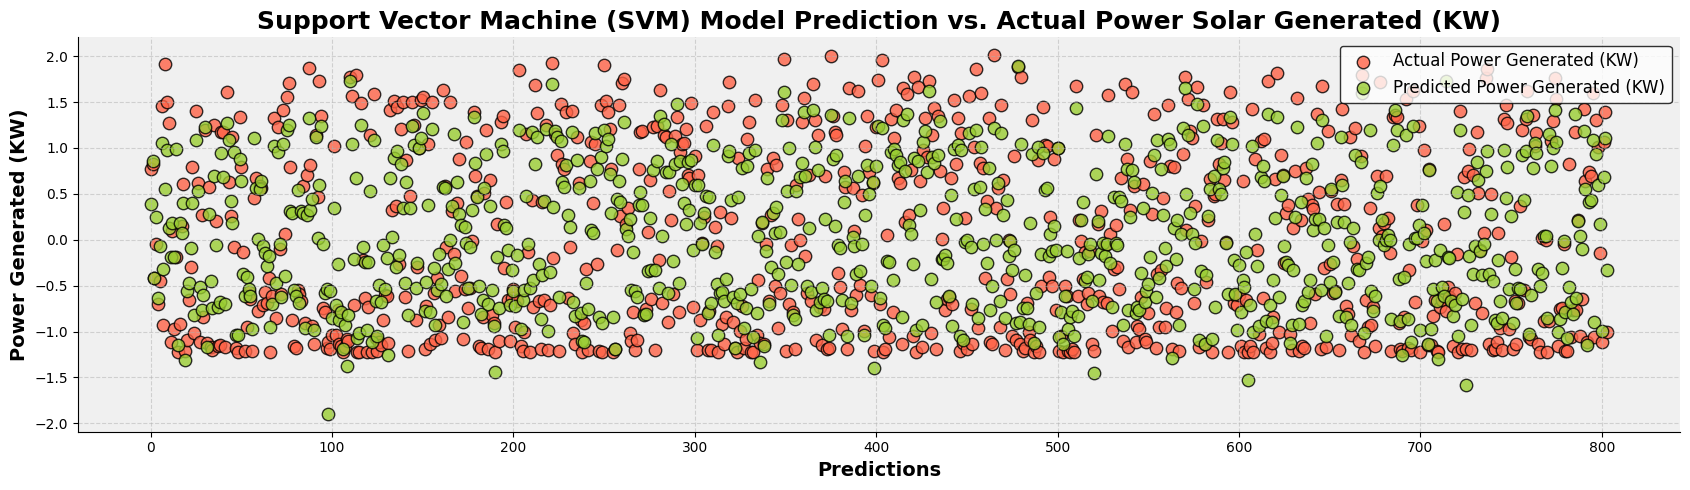

In [ ]:
# Scatter plot for actual and predicted data for Support Vector Machine (SVM)
plt.figure(figsize=(17, 5))
array = np.arange(len(y_test))
plt.scatter(array, y_test, color='#FF6347', label='Actual Power Generated (KW)', edgecolors='black', s=80, alpha=0.8)
plt.scatter(array, y_pred_svr, color='#9ACD32', label='Predicted Power Generated (KW)', edgecolors='black', s=80, alpha=0.8)
plt.title('Support Vector Machine (SVM) Model Prediction vs. Actual Power Solar Generated (KW)', fontsize=18, fontweight='bold')
plt.xlabel('Predictions', fontsize=14, fontweight='bold')
plt.ylabel('Power Generated (KW)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
legend = plt.legend(loc='upper right', fontsize=12, fancybox=True, framealpha=0.8, edgecolor='black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('#F0F0F0')
plt.tight_layout()
plt.show()

**Random Forest Regression**

In [ ]:
# Random Forest model with hyperparameter tuning
rf = RandomForestRegressor(max_depth = 5,random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

#Evalute the Random Forest Model
r2_score_rf = round(r2_score(y_test,y_pred_rf) * 100, 2)
mean_sq_rf = mean_squared_error(y_test,y_pred_rf)
mean_ab_rf = mean_absolute_error(y_test,y_pred_rf)
metrics_df.loc[len(metrics_df)] = ["Random Forest", r2_score_rf, mean_sq_rf, mean_ab_rf]
print("R2 Score for Random Forest Model: ",r2_score_rf,"%")
print("Mean Square Error of Random Forest Model: ",mean_sq_rf)
print("Mean Absolute Error of Random Forest Model: ",mean_ab_rf)

R2 Score for Random Forest Model:  77.65 %
Mean Square Error of Random Forest Model:  0.23074408344443378
Mean Absolute Error of Random Forest Model:  0.32603066566352806


In [ ]:
# Create traces for Actual and Predicted values for Random Forest
actual_trace = go.Scatter(x=list(range(100)), y=y_test.values[:100], mode='lines+markers', name='Actual Values', line=dict(color='red'), marker=dict(size=5))
predicted_trace = go.Scatter(x=list(range(100)), y=y_pred_rf[:100], mode='lines+markers', name='Predicted Values', line=dict(color='green'), marker=dict(size=5))
# Create layout
layout = go.Layout(
    title='Actual vs Predicted Values for Random Forest',
    xaxis=dict(title='Frequency Days'),
    yaxis=dict(title='Generated Power (KW)'),
    legend=dict(x=0, y=1),
    hovermode='closest')
# Create figure
fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)
# Show the plot
fig.show()

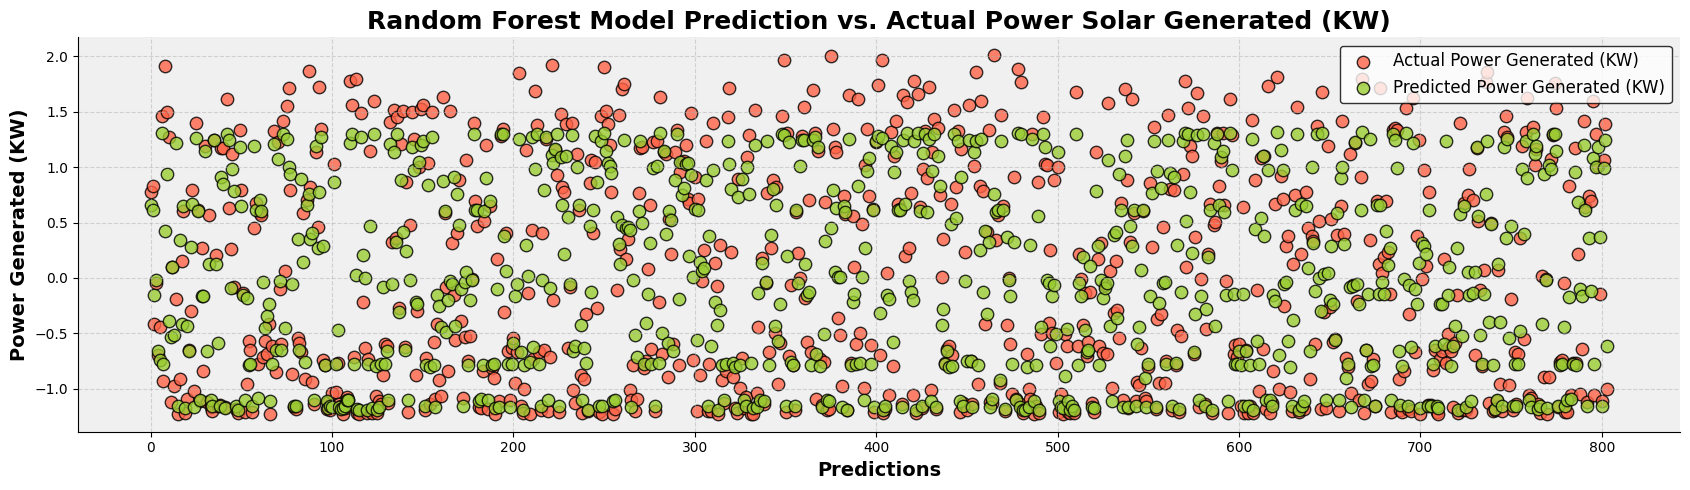

In [ ]:
# Scatter plot for actual and predicted data for Random Forest
plt.figure(figsize=(17, 5))
array = np.arange(len(y_test))
plt.scatter(array, y_test, color='#FF6347', label='Actual Power Generated (KW)', edgecolors='black', s=80, alpha=0.8)
plt.scatter(array, y_pred_rf, color='#9ACD32', label='Predicted Power Generated (KW)', edgecolors='black', s=80, alpha=0.8)
plt.title('Random Forest Model Prediction vs. Actual Power Solar Generated (KW)', fontsize=18, fontweight='bold')
plt.xlabel('Predictions', fontsize=14, fontweight='bold')
plt.ylabel('Power Generated (KW)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
legend = plt.legend(loc='upper right', fontsize=12, fancybox=True, framealpha=0.8, edgecolor='black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('#F0F0F0')
plt.tight_layout()
plt.show()

**Gradient Boosting Machine (GBM)**

In [ ]:
# Gradient Boosting model with hyperparameter tuning
gbm = GradientBoostingRegressor(n_estimators = 8,random_state=42)
param_grid_gbm = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
grid_search_gbm = GridSearchCV(gbm, param_grid_gbm, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gbm.fit(X_train, y_train)

# Best GBM model
best_gbm = grid_search_gbm.best_estimator_
y_pred_gbm = best_gbm.predict(X_test)

#Evalute the Gradient Boosting Model
r2_score_gbm = round(r2_score(y_test,y_pred_gbm) * 100, 2)
mean_sq_gbm = mean_squared_error(y_test,y_pred_gbm)
mean_ab_gbm = mean_absolute_error(y_test,y_pred_gbm)
metrics_df.loc[len(metrics_df)] = ["Gradient Boosting", r2_score_gbm, mean_sq_gbm, mean_ab_gbm]
print("R2 Score for Gradient Boosting Model: ",r2_score_gbm,"%")
print("Mean Square Error of Gradient Boosting Model: ",mean_sq_gbm)
print("Mean Absolute Error of Gradient Boosting Model: ",mean_ab_gbm)

R2 Score for Gradient Boosting Model:  76.79 %
Mean Square Error of Gradient Boosting Model:  0.23963099462335988
Mean Absolute Error of Gradient Boosting Model:  0.3644358121616285


In [ ]:
# Create traces for Actual and Predicted values for Gradient Boosting Machine (GBM)
actual_trace = go.Scatter(x=list(range(100)), y=y_test.values[:100], mode='lines+markers', name='Actual Values', line=dict(color='red'), marker=dict(size=5))
predicted_trace = go.Scatter(x=list(range(100)), y=y_pred_gbm[:100], mode='lines+markers', name='Predicted Values', line=dict(color='green'), marker=dict(size=5))
# Create layout
layout = go.Layout(
    title='Actual vs Predicted Values for Gradient Boosting Machine (GBM)',
    xaxis=dict(title='Frequency Days'),
    yaxis=dict(title='Generated Power (KW)'),
    legend=dict(x=0, y=1),
    hovermode='closest')
# Create figure
fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)
# Show the plot
fig.show()

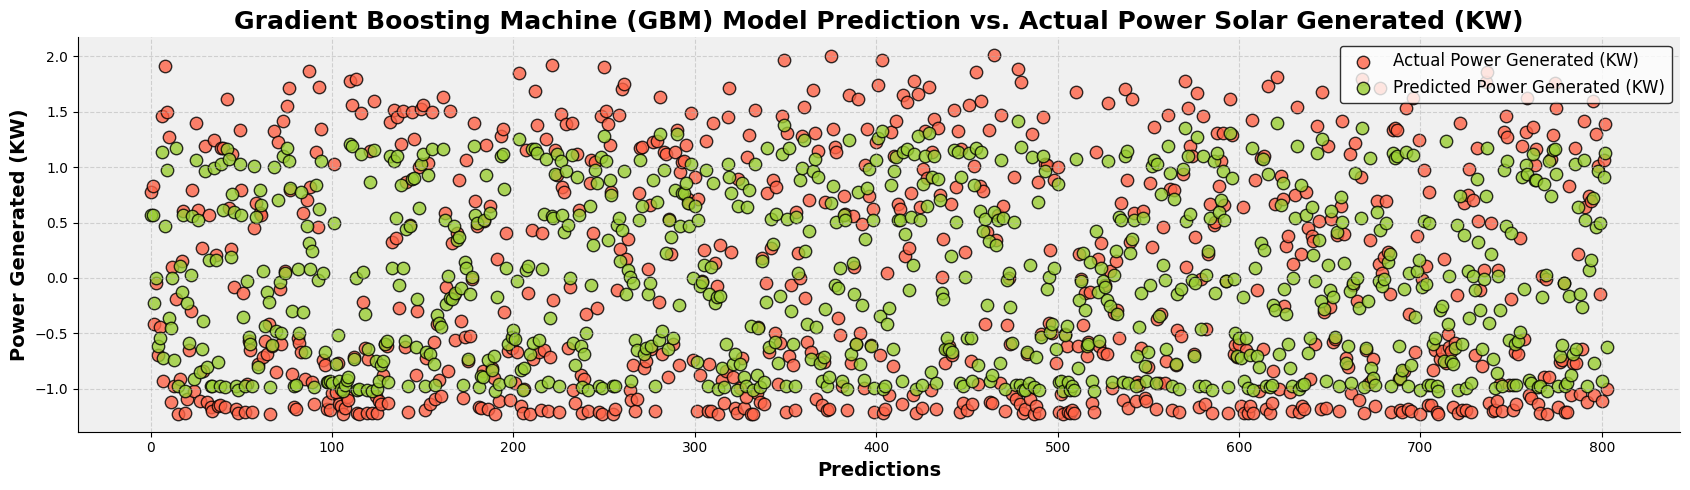

In [ ]:
# Scatter plot for actual and predicted data for Gradient Boosting Machine (GBM)
plt.figure(figsize=(17, 5))
array = np.arange(len(y_test))
plt.scatter(array, y_test, color='#FF6347', label='Actual Power Generated (KW)', edgecolors='black', s=80, alpha=0.8)
plt.scatter(array, y_pred_gbm, color='#9ACD32', label='Predicted Power Generated (KW)', edgecolors='black', s=80, alpha=0.8)
plt.title('Gradient Boosting Machine (GBM) Model Prediction vs. Actual Power Solar Generated (KW)', fontsize=18, fontweight='bold')
plt.xlabel('Predictions', fontsize=14, fontweight='bold')
plt.ylabel('Power Generated (KW)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
legend = plt.legend(loc='upper right', fontsize=12, fancybox=True, framealpha=0.8, edgecolor='black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('#F0F0F0')
plt.tight_layout()
plt.show()

#### **Step 6: Deep Learning Models**

**LSTM for Time Series**

In [ ]:
# Reshape data for LSTM (samples, timesteps, features)
timesteps = 1

# Reshape data for LSTM input
x_train_lstm = X_train.values.reshape((X_train.shape[0], timesteps, X_train.shape[1]))
x_test_lstm = X_test.values.reshape((X_test.shape[0], timesteps, X_test.shape[1]))

# Scale the target variable to a range between 0 and 1
scaler_y = MinMaxScaler()  # Initialize the scaler
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [ ]:
# Build the LSTM model
model = Sequential()  # Initialize a sequential model
# Add the first LSTM layer with 100 units and return sequences for the next LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2])))
# Add the second LSTM layer without returning sequences
model.add(LSTM(units=50))
# Add a Dropout layer to reduce overfitting
model.add(Dropout(rate=0.2))
# Add a Dense layer with a single output unit for regression
model.add(Dense(units=1))

# Compile the model with Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model on the training data
model.fit(x_train_lstm, y_train_scaled, epochs=50, batch_size=128)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2111
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0830  
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0336  
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0285  
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0262 
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0252 
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0249
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0241 
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0232  
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0232  
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0233 
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0223  
Epoch 13/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0223 
Epoch 14/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0223
Epoch 15/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0215  


In [ ]:
# Make predictions on the test data
y_pred_lstm_scaled = model.predict(x_test_lstm)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
#Evalute the LSTM model's performance
r2_score_lstm = round(r2_score(y_test,y_pred_lstm) * 100, 2)
mean_sq_lstm = mean_squared_error(y_test,y_pred_lstm)
mean_ab_lstm = mean_absolute_error(y_test,y_pred_lstm)
metrics_df.loc[len(metrics_df)] = ["LSTM", r2_score_lstm, mean_sq_lstm, mean_ab_lstm]
print("R2 Score for LSTM Model: ",r2_score_lstm,"%")
print("Mean Square Error of LSTM Model: ",mean_sq_lstm)
print("Mean Absolute Error of LSTM Model: ",mean_ab_lstm)

R2 Score for LSTM Model:  80.24 %
Mean Square Error of LSTM Model:  0.20402779226884776
Mean Absolute Error of LSTM Model:  0.312377688764255


In [ ]:
# Create traces for Actual and Predicted values for CNN model
actual_trace = go.Scatter(x=list(range(100)), y=y_test.values[:100], mode='lines+markers', name='Actual Values', line=dict(color='red'), marker=dict(size=5))
predicted_trace = go.Scatter(x=list(range(100)), y=y_pred_lstm[:100].flatten(), mode='lines+markers', name='Predicted Values', line=dict(color='green'), marker=dict(size=5))
# Create layout
layout = go.Layout(
    title='Actual vs Predicted Values for LSTM model',
    xaxis=dict(title='Frequency Days'),
    yaxis=dict(title='Generated Power (KW)'),
    legend=dict(x=0, y=1),
    hovermode='closest')
# Create figure
fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)
# Show the plot
fig.show()

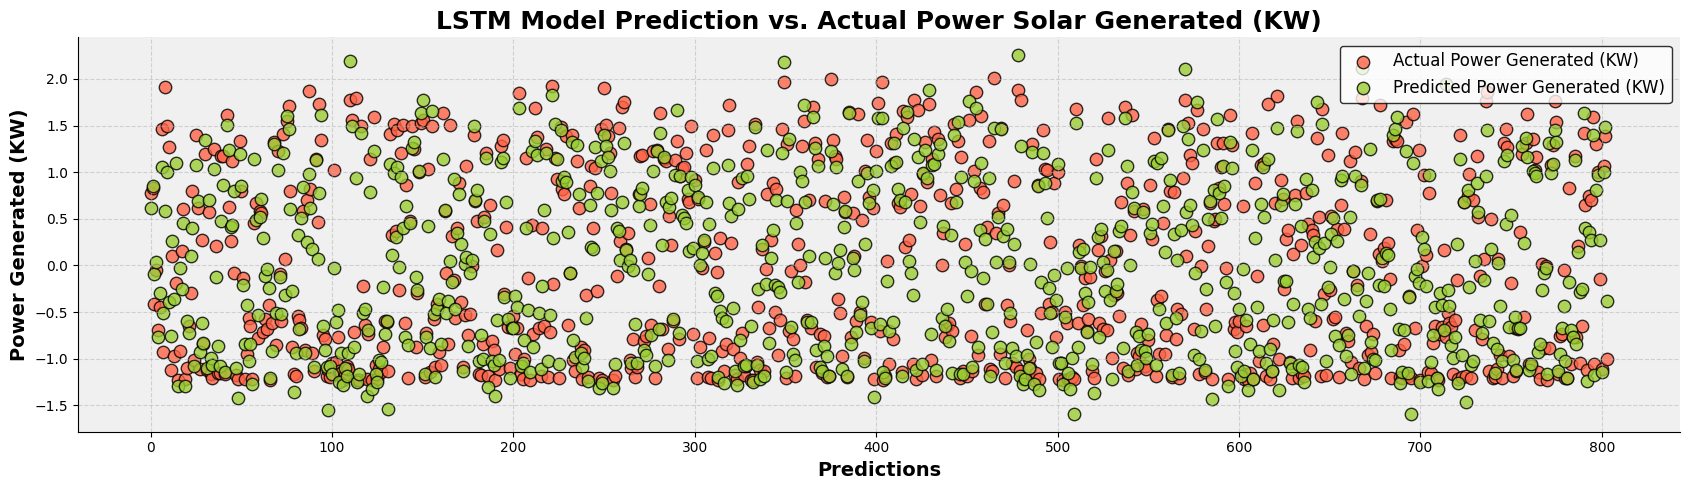

In [ ]:
# Scatter plot for actual and predicted data for LSTM model
plt.figure(figsize=(17, 5))
array = np.arange(len(y_test))
plt.scatter(array, y_test, color='#FF6347', label='Actual Power Generated (KW)', edgecolors='black', s=80, alpha=0.8)
plt.scatter(array, y_pred_lstm, color='#9ACD32', label='Predicted Power Generated (KW)', edgecolors='black', s=80, alpha=0.8)
plt.title('LSTM Model Prediction vs. Actual Power Solar Generated (KW)', fontsize=18, fontweight='bold')
plt.xlabel('Predictions', fontsize=14, fontweight='bold')
plt.ylabel('Power Generated (KW)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
legend = plt.legend(loc='upper right', fontsize=12, fancybox=True, framealpha=0.8, edgecolor='black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('#F0F0F0')
plt.tight_layout()
plt.show()

**Transformer Model (Solar-Net)**

In [ ]:
# Reshape data for transformer
timesteps = 1
x_train_trans = X_train.values.reshape((X_train.shape[0], timesteps, X_train.shape[1]))
x_test_trans = X_test.values.reshape((X_test.shape[0], timesteps, X_test.shape[1]))

# Scale the target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [ ]:
# Define the Transformer Model (Solar-Net) HyperModel
class TransformerHyperModel(HyperModel):
    def build(self, hp):
        inputs = Input(shape=(x_train_trans.shape[1], x_train_trans.shape[2]))

        # Hyperparameters
        num_heads = hp.Int('num_heads', min_value=2, max_value=8, step=2)
        ff_dim = hp.Int('ff_dim', min_value=16, max_value=128, step=16)
        dropout_rate = hp.Float('dropout_rate', 0.1, 0.5, step=0.1)

        # Build transformer block
        x = self.transformer_block(inputs, num_heads, ff_dim, dropout_rate)
        x = GlobalAveragePooling1D()(x)
        x = Dropout(0.3)(x)
        outputs = Dense(1)(x)

        model = Model(inputs, outputs)
        model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
        return model

    def transformer_block(self, inputs, num_heads, ff_dim, dropout):
        # Multi-head attention layer
        attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
        attention_output = Dropout(dropout)(attention_output)
        out1 = LayerNormalization(epsilon=1e-6)(inputs + attention_output)

        # Feed-forward network
        ffn_output = Dense(ff_dim, activation='relu')(out1)
        ffn_output = Dropout(dropout)(ffn_output)

        # Ensure dimensions match for addition
        if out1.shape[-1] != ffn_output.shape[-1]:
            ffn_output = Dense(out1.shape[-1])(ffn_output)

        return LayerNormalization(epsilon=1e-6)(out1 + ffn_output)

In [ ]:
# Create the tuner
tuner = RandomSearch(
    TransformerHyperModel(),
    objective='val_mae',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='transformer_tuning'
)

Reloading Tuner from my_dir\transformer_tuning\tuner0.json


In [ ]:
# Split the training data for validation
x_train_split, x_val_split = x_train_trans[:int(len(x_train_trans)*0.8)], x_train_trans[int(len(x_train_trans)*0.8):]
y_train_split, y_val_split = y_train_scaled[:int(len(y_train_scaled)*0.8)], y_train_scaled[int(len(y_train_scaled)*0.8):]

In [ ]:
# Start the tuning process
tuner.search(x_train_split, y_train_split, epochs=100, validation_data=(x_val_split, y_val_split))

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Train the best model on the full training data
best_model.fit(x_train_trans, y_train_scaled, epochs=100, batch_size=32)


Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0211 - mae: 0.1090
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0215 - mae: 0.1084
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209 - mae: 0.1063
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206 - mae: 0.1061
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0214 - mae: 0.1081
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206 - mae: 0.1053
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0208 - mae: 0.1057
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - mae: 0.1041
Epoch 9/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0203 - mae: 0.1043
Epoch 10/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - mae: 0.1048
Epoch 11/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0204 - mae: 0.1036
Epoch 12/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0199 - mae: 0.1032
Epoch 13/100

In [ ]:
# Make predictions
y_pred_trans_scaled = best_model.predict(x_test_trans)
y_pred_trans = scaler_y.inverse_transform(y_pred_trans_scaled)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
# Evaluate the model
mse_trans = mean_squared_error(y_test, y_pred_trans)
rmse_trans = np.sqrt(mean_squared_error(y_test, y_pred_trans))
r2_trans = r2_score(y_test, y_pred_trans)

print("Best Hyperparameters:")
print("Num Heads:", best_hyperparameters['num_heads'])
print("Feed-Forward Dim:", best_hyperparameters['ff_dim'])
print("Dropout Rate:", best_hyperparameters['dropout_rate'])

Best Hyperparameters:
Num Heads: 6
Feed-Forward Dim: 128
Dropout Rate: 0.1


In [ ]:
#Evalute the Solar-Net Transformer model's performance
r2_score_solar = round(r2_score(y_test,y_pred_trans) * 100, 2)
mean_sq_solar = mean_squared_error(y_test,y_pred_trans)
mean_ab_solar = mean_absolute_error(y_test,y_pred_trans)
metrics_df.loc[len(metrics_df)] = ["Solar-Net Transformer", r2_score_solar, mean_sq_solar, mean_ab_solar]
print("R2 Score for Solar-Net Transformer Model: ",r2_score_solar,"%")
print("Mean Square Error of Solar-Net Transformer Model: ",mean_sq_solar)
print("Mean Absolute Error of Solar-Net Transformer Model: ",mean_ab_solar)

R2 Score for Solar-Net Transformer Model:  81.54 %
Mean Square Error of Solar-Net Transformer Model:  0.19061348215622076
Mean Absolute Error of Solar-Net Transformer Model:  0.2898884608017335


In [ ]:
# Create traces for Actual and Predicted values for Solar-Net Transformer model
actual_trace = go.Scatter(x=list(range(100)), y=y_test.values[:100], mode='lines+markers', name='Actual Values', line=dict(color='red'), marker=dict(size=5))
predicted_trace = go.Scatter(x=list(range(100)), y=y_pred_trans[:100].flatten(), mode='lines+markers', name='Predicted Values', line=dict(color='green'), marker=dict(size=5))
# Create layout
layout = go.Layout(
    title='Actual vs Predicted Values for Solar-Net Transformer model',
    xaxis=dict(title='Frequency Days'),
    yaxis=dict(title='Generated Power (KW)'),
    legend=dict(x=0, y=1),
    hovermode='closest')
# Create figure
fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)
# Show the plot
fig.show()

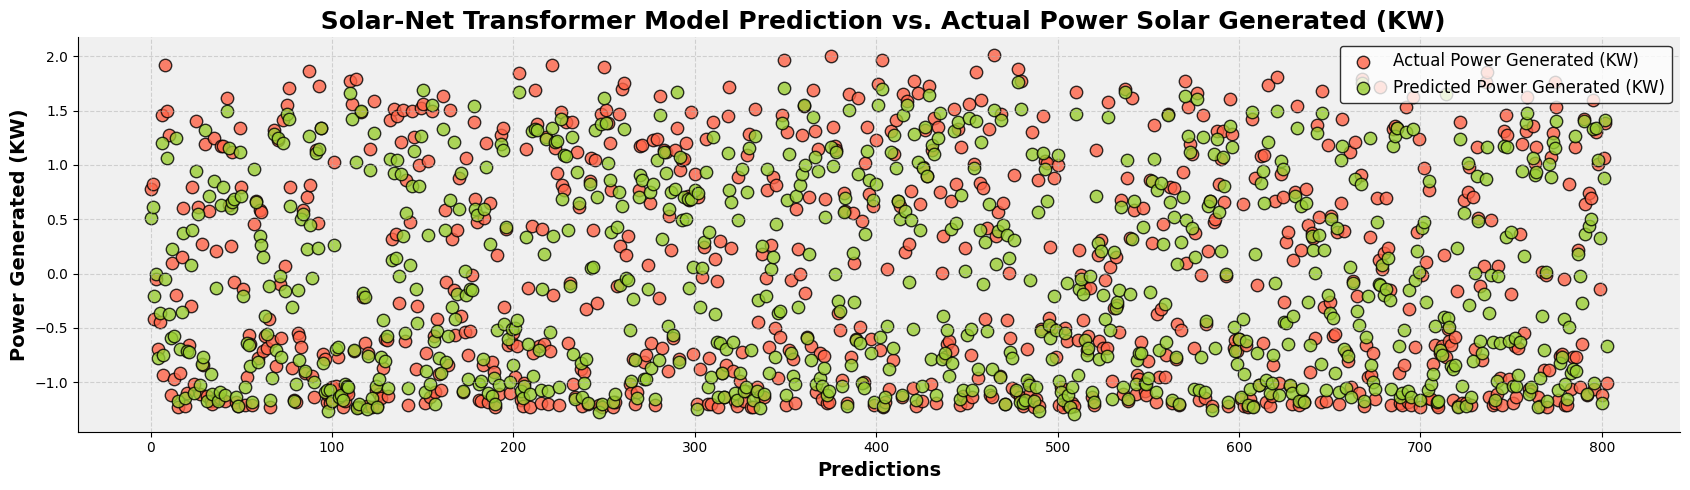

In [ ]:
# Scatter plot for actual and predicted data for Solar-Net Transformer model
plt.figure(figsize=(17, 5))
array = np.arange(len(y_test))
plt.scatter(array, y_test, color='#FF6347', label='Actual Power Generated (KW)', edgecolors='black', s=80, alpha=0.8)
plt.scatter(array, y_pred_trans, color='#9ACD32', label='Predicted Power Generated (KW)', edgecolors='black', s=80, alpha=0.8)
plt.title(' Solar-Net Transformer Model Prediction vs. Actual Power Solar Generated (KW)', fontsize=18, fontweight='bold')
plt.xlabel('Predictions', fontsize=14, fontweight='bold')
plt.ylabel('Power Generated (KW)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
legend = plt.legend(loc='upper right', fontsize=12, fancybox=True, framealpha=0.8, edgecolor='black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('#F0F0F0')
plt.tight_layout()
plt.show()

### **Step 7: Compare the Machine Learning Models**

In [ ]:
# Display the metrics DataFrame
metrics_df

Model  R2 Score (%)  Mean Squared Error  \
0  Support Vector Machine         74.77            0.260527   
1           Random Forest         77.65            0.230744   
2       Gradient Boosting         76.79            0.239631   
3                    LSTM         80.24            0.204028   
4   Solar-Net Transformer         81.54            0.190613   

   Mean Absolute Error  
0             0.406757  
1             0.326031  
2             0.364436  
3             0.312378  
4             0.289888

In [ ]:
# Create a horizontal bar chart
fig = px.bar(metrics_df,
             x='R2 Score (%)',
             y='Model',
             orientation='h',
             title='Comparison of Models by R-Squared Score',
             labels={'R2 Score (%)': 'R-Squared Score (%)', 'Model': 'Algorithm'},
             color='R2 Score (%)',  # Color bars by R2 Score
             color_continuous_scale='Viridis')  # Use a nice color scale

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='R-Squared Score (%)',
    yaxis_title='Algorithm',
    title_font_size=14,
    xaxis_tickfont_size=10,
    yaxis_tickfont_size=10,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjust margins
)

# Show the plot
fig.show()